# Transit Light Curves

* Transit Light Curves are graphs that show how the brightness of a star changes over time due to the transit of a planet or another body across its face. This method is widely used in the detection and study of exoplanets. When a planet transits in front of a star, it blocks a portion of the star's light, causing a temporary dip in the star's observed brightness. The characteristics of this dip can provide valuable information about the planet, such as its size and orbital period.
* The amount of light blocked, and hence the depth of the transit in the light curve, depends on the ratio of the areas of the planet and the star. The formula for the fractional decrease in a star's brightness during a planetary transit, considering the areas of the star and planet as spheres, is given by the ratio of their surface areas.
  > $\Delta F = \left( \frac{R_p}{R_s} \right)^2$

  or

  > $\frac{\Delta F}{F} = \left( \frac{4 \pi R_{p}^{2}}{4 \pi R_{s}^{2}} \right)^2$

  where:

  $\Delta F$: the fractional decrease in the star's brightness

  $R_p$: the radius of the planet

  $R_s$: the radius of the star

In [ ]:
%%capture
!pip install astroquery

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support
from astropy import units as unit
plt.style.use("dark_background")
%matplotlib inline

In [2]:
def CalculateDeltaF(radiusPlanet:int or float,radiusStar:int or float)->int or float:
  """
    Calculate the fractional decrease in brightness of a star due to a transiting planet.

    :param radiusPlanet(R_p): Radius of the planet (in kilometers or any consistent unit)
    :param radiusStar(R_s): Radius of the star (in the same unit as R_p)
    :return: Fractional decrease in brightness (Delta F)
  """
  return (radiusPlanet/radiusStar)**2

In [3]:
radiusStar = 695700  # Radius of the Sun in kilometers
radiusPlanet = 69911  # Radius of Jupiter in kilometers

In [4]:
deltaF = CalculateDeltaF(radiusPlanet,radiusStar)
print(f"The fractional decrease in brightness (Delta F) is: {deltaF}")

The fractional decrease in brightness (Delta F) is: 0.010098271011134767


In [6]:
Rstar = 1*unit.R_sun # Radius of the star in solar radii
Rplanet = 1*unit.R_jup # Radius of the planet in Jupiter radii

In [7]:
timeInterval = np.linspace(-0.05,0.05,1000) # Time in days around the transit

In [8]:
# For simplicity, we assume a uniform disk (no limb darkening) and a central transit
fractionalRadius = (Rplanet/Rstar).decompose() # Fractional size of the planet compared to the star
print(f"Fractional Radius: {fractionalRadius}")

Fractional Radius: 0.10276268506540175


In [9]:
lightCurve = 1 - (fractionalRadius**2*(np.abs(timeInterval)<0.01)) # Simple box model for transit

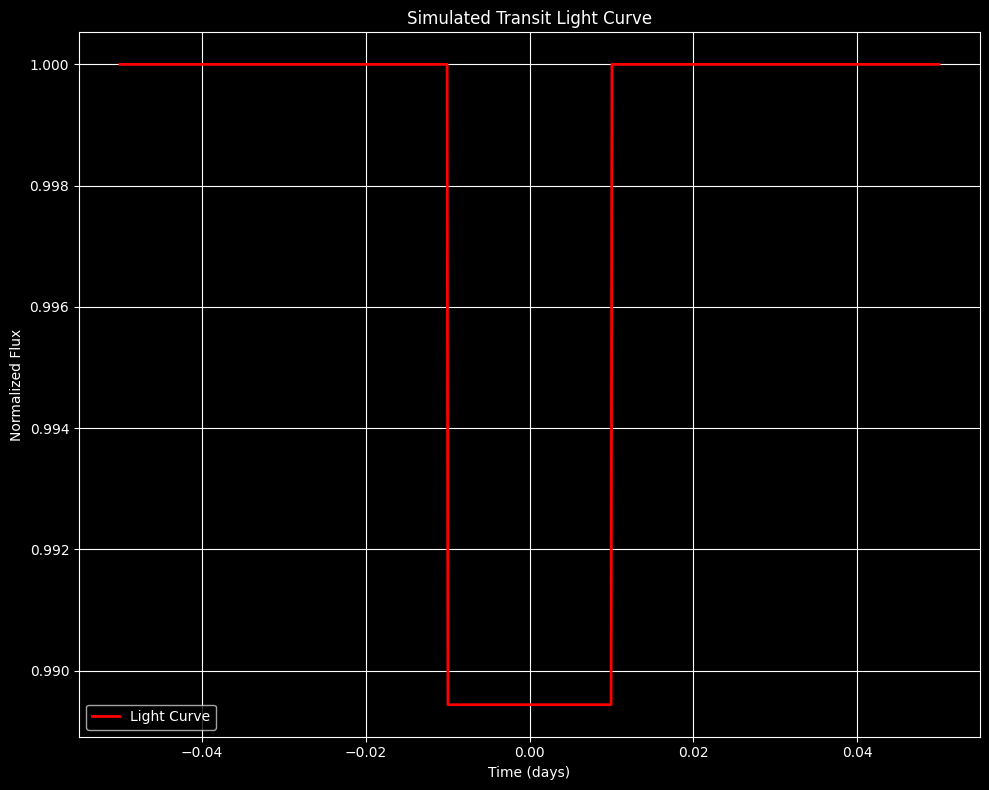

In [10]:
plt.figure(figsize=(10,8))
plt.plot(timeInterval,lightCurve,color="red",lw=2,label="Light Curve")
plt.xlabel("Time (days)")
plt.ylabel("Normalized Flux")
plt.title("Simulated Transit Light Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
starRadius = 1.0 # Star radius
planetRadius = 0.1 # Planet radius (relative to star)
orbitRadius = 1.5 # Orbit radius (relative to star)
transitDuration = 100 # Number of frames for the transit

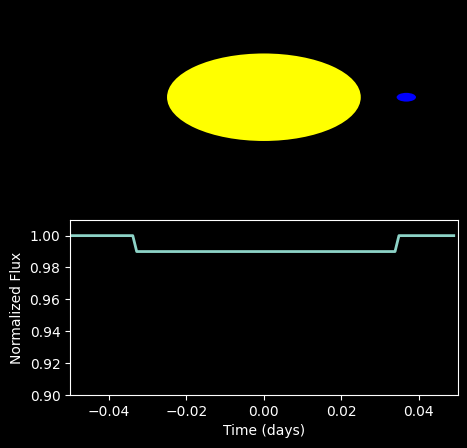

In [20]:
figure,(axs1,axs2) = plt.subplots(2,1,figsize=(5,5))
axs1.axis("off")
axs1.set_xlim(-2,2)
axs1.set_ylim(-2,2)
star = plt.Circle((0,0),starRadius,color="yellow",ec="none")
axs1.add_artist(star)
planet = plt.Circle((-orbitRadius,0),planetRadius,color="blue",ec="none")
axs1.add_artist(planet)
axs2.set_xlim(-0.05,0.05)
axs2.set_ylim(0.9,1.01)
axs2.set_xlabel("Time (days)")
axs2.set_ylabel("Normalized Flux")
fluxLine, = axs2.plot([],[],lw=2)
timeArray = np.linspace(-0.05,0.05,transitDuration)
fluxArray = np.ones(transitDuration)
def Update(frame)->tuple:
  x = -orbitRadius+(2*orbitRadius*frame/transitDuration)
  planet.center = (x,0)
  if -starRadius <= x <= starRadius:
    star.set_alpha(0.5) # Dim the star during transit
  else:
    star.set_alpha(1.0) # Star is fully bright outside of transit
  if np.abs(x) < starRadius:
    fluxArray[frame] = 1 - (planetRadius/starRadius)**2
  else:
    fluxArray[frame] = 1
  fluxLine.set_data(timeArray[:frame],fluxArray[:frame])
  return star,planet,fluxLine
anim = animation.FuncAnimation(figure,Update,frames=transitDuration,blit=True,repeat=False)
anim.save('transit_animation.mp4', writer="ffmpeg",fps=20)
plt.show()

# Data Process

In [13]:
from google.colab import drive
drive.mount("/content/driveFile")

Mounted at /content/driveFile


In [14]:
dataPath = "/content/driveFile/MyDrive/Astronomy/Project Data/dat_file/light_curve_data/tres2_data.dat"

In [23]:
data = np.loadtxt(dataPath)

In [24]:
data.shape

(247, 3)

In [25]:
MJD = data[:,0] # The Modified Julian Date (MJD)
FLUX = data[:,1]
ERR = data[:,2]

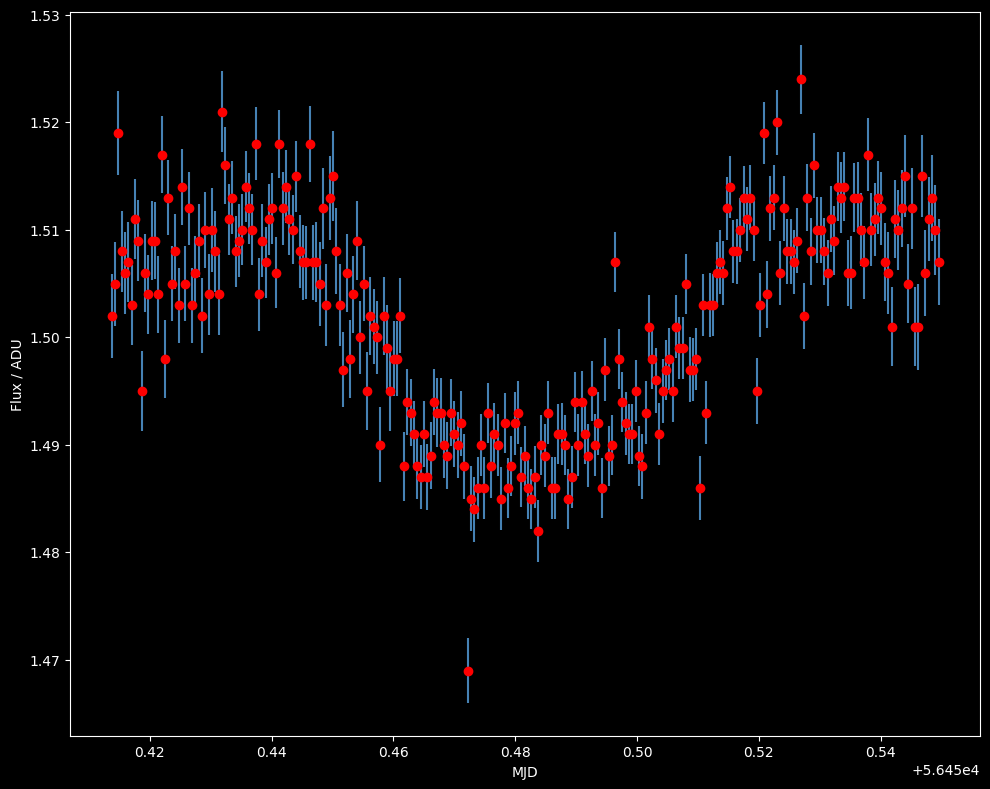

In [26]:
plt.figure(figsize=(10,8))
plt.errorbar(MJD,FLUX,yerr=ERR,ecolor="steelblue",linestyle="none",marker="o",color="red")
plt.xlabel("MJD")
plt.ylabel("Flux / ADU")
plt.tight_layout()
plt.show()

In [27]:
# to calculate a normalization factor from all flux values outside of the transit
T1 = 5.645e4 + 0.445
T4 = 5.645e4 + 0.520
norm1 = np.mean(FLUX[MJD<T1])
norm2 = np.mean(FLUX[MJD>T4])
norm = 0.5*(norm1+norm2)
print(f"Normalization Factor: {norm}")

Normalization Factor: 1.5094473684210525


In [28]:
FLUX /= norm
ERR /= norm

In [29]:
offset = 7
width = 2*offset+1
fluxSmoothed = np.ones(FLUX.size-width+1)
for index,value in enumerate(fluxSmoothed):
  fluxSmoothed[index] = np.sum(FLUX[index:index+width])/width
fluxMin = np.min(fluxSmoothed)
print(f"Minimum Flux: {fluxMin}")

Minimum Flux: 0.9849520854036276


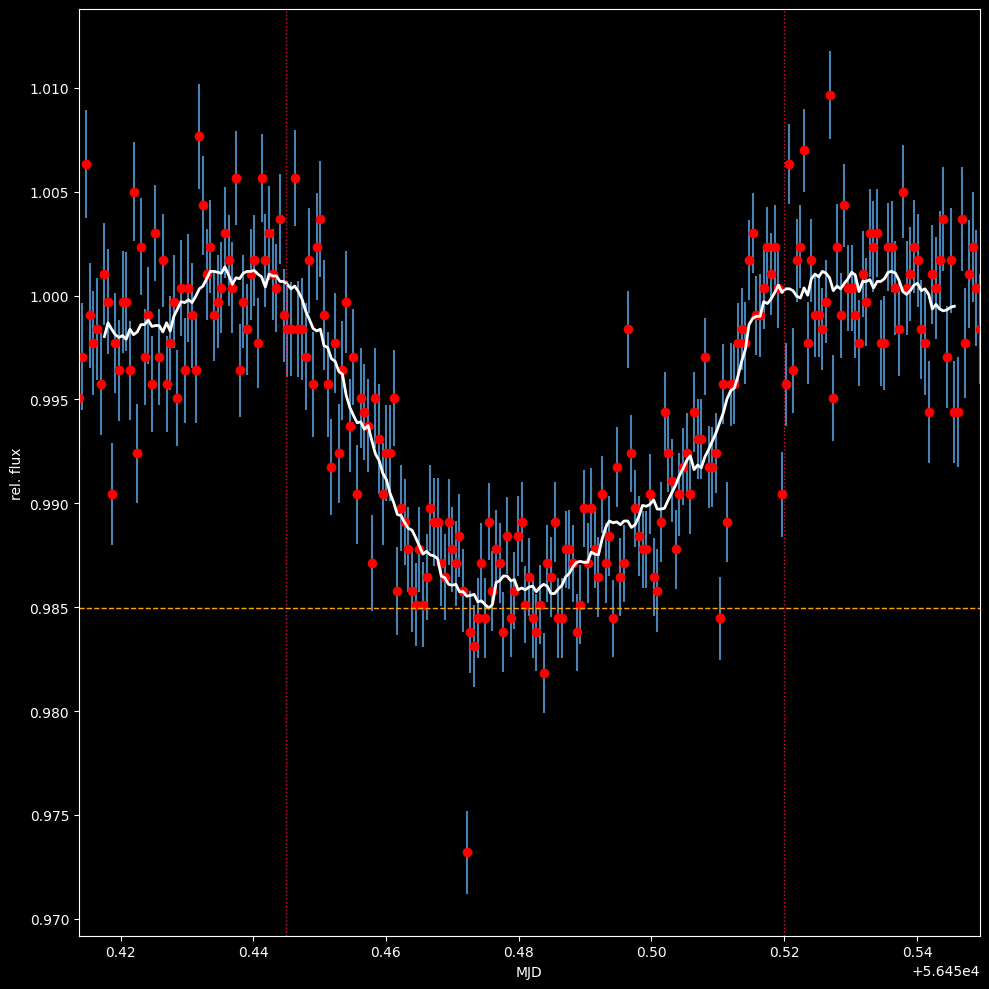

In [30]:
plt.figure(figsize=(10,10))
plt.errorbar(MJD,FLUX,yerr=ERR,ecolor="steelblue",linestyle="none",marker="o",color="red",zorder=1)
plt.xlim(np.min(MJD),np.max(MJD))
plt.xlabel("MJD")
plt.ylabel("rel. flux")
plt.plot(MJD[offset:-offset],fluxSmoothed,lw=2,color="white",zorder=2)
plt.axvline(T1,color="crimson",lw=1,linestyle=":")
plt.axvline(T4,color="crimson",lw=1,linestyle=":")
plt.axhline(fluxMin,lw=1,linestyle="--",color="orange")
plt.tight_layout()
plt.show()

# Example - Exoplanet

In [34]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
from astropy.table import Table

In [44]:
%%capture
# Example exoplanet data
exoplanetName = "Kepler-10 b"
dataTable = NasaExoplanetArchive.query_object(exoplanetName,table="ps")

In [45]:
data = Table(dataTable).to_pandas()

In [46]:
data

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,gaia_id,default_flag,pl_refname,sy_refname,...,sy_jmagstr,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_hmagstr,sy_kmag,sy_kmagerr1,sy_kmagerr2,sky_coord.ra,sky_coord.dec
0,Kepler-10 b,b,Kepler-10,,,TIC 377780790,Gaia DR2 2132155017099178624,0,<a refstr=FOGTMANN_SCHULZ_ET_AL__2014 href=htt...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.889&plusmn;0.022,9.563,0.025,-0.025,9.563&plusmn;0.025,9.496,0.021,-0.021,285.679298,50.241484
1,Kepler-10 b,b,Kepler-10,,,TIC 377780790,Gaia DR2 2132155017099178624,0,<a refstr=MORTON_ET_AL__2016 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.889&plusmn;0.022,9.563,0.025,-0.025,9.563&plusmn;0.025,9.496,0.021,-0.021,285.679298,50.241484
2,Kepler-10 b,b,Kepler-10,,,TIC 377780790,Gaia DR2 2132155017099178624,0,<a refstr=RAJPAUL_ET_AL__2017 href=https://ui....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.889&plusmn;0.022,9.563,0.025,-0.025,9.563&plusmn;0.025,9.496,0.021,-0.021,285.679298,50.241484
3,Kepler-10 b,b,Kepler-10,,,TIC 377780790,Gaia DR2 2132155017099178624,0,<a refstr=HOLCZER_ET_AL__2016 href=https://ui....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.889&plusmn;0.022,9.563,0.025,-0.025,9.563&plusmn;0.025,9.496,0.021,-0.021,285.679298,50.241484
4,Kepler-10 b,b,Kepler-10,,,TIC 377780790,Gaia DR2 2132155017099178624,0,<a refstr=Q1_Q12_KOI_TABLE href=https://exopla...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.889&plusmn;0.022,9.563,0.025,-0.025,9.563&plusmn;0.025,9.496,0.021,-0.021,285.679298,50.241484
5,Kepler-10 b,b,Kepler-10,,,TIC 377780790,Gaia DR2 2132155017099178624,0,<a refstr=Q1_Q17_DR25_SUPPLEMENTAL_KOI_TABLE h...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.889&plusmn;0.022,9.563,0.025,-0.025,9.563&plusmn;0.025,9.496,0.021,-0.021,285.679298,50.241484
6,Kepler-10 b,b,Kepler-10,,,TIC 377780790,Gaia DR2 2132155017099178624,0,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.889&plusmn;0.022,9.563,0.025,-0.025,9.563&plusmn;0.025,9.496,0.021,-0.021,285.679298,50.241484
7,Kepler-10 b,b,Kepler-10,,,TIC 377780790,Gaia DR2 2132155017099178624,0,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.889&plusmn;0.022,9.563,0.025,-0.025,9.563&plusmn;0.025,9.496,0.021,-0.021,285.679298,50.241484
8,Kepler-10 b,b,Kepler-10,,,TIC 377780790,Gaia DR2 2132155017099178624,1,<a refstr=BONOMO_ET_AL__2023 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.889&plusmn;0.022,9.563,0.025,-0.025,9.563&plusmn;0.025,9.496,0.021,-0.021,285.679298,50.241484
9,Kepler-10 b,b,Kepler-10,,,TIC 377780790,Gaia DR2 2132155017099178624,0,<a refstr=DAI_ET_AL__2019 href=https://ui.adsa...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.889&plusmn;0.022,9.563,0.025,-0.025,9.563&plusmn;0.025,9.496,0.021,-0.021,285.679298,50.241484


In [47]:
data.to_csv("kepler_10b.csv")

## Additional

In [ ]:
%%capture
!pip install lightkurve

In [49]:
import lightkurve as lk

In [50]:
%%capture
# Search and download light curve data for Kepler-10 b
searchResult = lk.search_lightcurve("Kepler-10 b",mission="Kepler",cadence="long")
lightCurve = searchResult.download()

In [52]:
lightCurve

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
120.5391465105713,5.0146684e+05,2.0574972e+01,0,9.940906e-04,659.36896,250.31948,568,5.3272462e+05,2.0045162e+01,2.4877234e+03,1.3237703e+00,5.0146684e+05,2.0574972e+01,0,———,———,———,———,659.36896,3.6308160e-05,250.31948,5.3553398e-05,1.7792054e-03,3.3286733e-03
120.55958073025249,5.0141212e+05,2.0597826e+01,0,9.947103e-04,659.36919,250.31978,569,5.3274544e+05,2.0045479e+01,2.4910432e+03,1.3229831e+00,5.0141212e+05,2.0597826e+01,0,———,———,———,———,659.36919,3.6305861e-05,250.31978,5.3553318e-05,1.9566093e-03,3.5631030e-03
120.58001484981651,5.0140281e+05,2.0634075e+01,0,9.953298e-04,659.36918,250.31934,570,5.3274400e+05,2.0045910e+01,2.4830063e+03,1.3249981e+00,5.0140281e+05,2.0634075e+01,0,———,———,———,———,659.36918,3.6309517e-05,250.31934,5.3547948e-05,2.0698714e-03,3.4072644e-03
120.60044916937477,5.0135972e+05,2.0607729e+01,0,9.959494e-04,659.36967,250.31932,571,5.3266388e+05,2.0044411e+01,2.4886853e+03,1.3235550e+00,5.0135972e+05,2.0607729e+01,0,———,———,———,———,659.36967,3.6312224e-05,250.31932,5.3564647e-05,2.4259784e-03,3.0491522e-03
120.62088338893955,5.0144759e+05,2.0585588e+01,0,9.965689e-04,659.36989,250.31906,572,5.3276494e+05,2.0046177e+01,2.4869612e+03,1.3239022e+00,5.0144759e+05,2.0585588e+01,0,———,———,———,———,659.36989,3.6307927e-05,250.31906,5.3543699e-05,2.7262936e-03,3.2327282e-03
120.64131750838715,5.0142422e+05,2.0622503e+01,0,9.971884e-04,659.37001,250.31846,573,5.3270619e+05,2.0045256e+01,2.4852412e+03,1.3248761e+00,5.0142422e+05,2.0622503e+01,0,———,———,———,———,659.37001,3.6310295e-05,250.31846,5.3552700e-05,2.8024365e-03,2.5497559e-03
120.66175172782823,5.0134612e+05,2.0596804e+01,0,9.978078e-04,659.37024,250.31868,574,5.3262088e+05,2.0043943e+01,2.4874382e+03,1.3227766e+00,5.0134612e+05,2.0596804e+01,0,———,———,———,———,659.37024,3.6316073e-05,250.31868,5.3557891e-05,2.9968296e-03,2.9109719e-03
120.68218604727736,5.0136928e+05,2.0572752e+01,0,9.984273e-04,659.37011,250.31860,575,5.3262475e+05,2.0044262e+01,2.4853333e+03,1.3250123e+00,5.0136928e+05,2.0572752e+01,0,———,———,———,———,659.37011,3.6316418e-05,250.31860,5.3558793e-05,2.9321318e-03,2.7981971e-03


In [53]:
lightCurve.to_csv("lightcurve_kepler.csv")

In [54]:
flatLightCurve = lightCurve.remove_nans().flatten()

In [55]:
planetPeriod = 0.837491  # period in days
planetEpoch = 2454964.575  # time of first transit in Julian Day

In [ ]:
%%capture
# Fold the light curve with the known period and epoch of Kepler-10 b
foldedLightCurve = flatLightCurve.fold(period=planetPeriod,epoch_time=planetEpoch)

In [57]:
foldedLightCurve

time,flux,flux_err,time_original,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
TimeDelta,float64,float64,Time,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
-0.40524283067235634,9.9985028e-01,4.1097525e-05,120.60044916937477,0,9.959494e-04,659.36967,250.31932,571,5.3266388e+05,2.0044411e+01,2.4886853e+03,1.3235550e+00,5.0135972e+05,2.0607729e+01,0,———,———,———,———,659.36967,3.6312224e-05,250.31932,5.3564647e-05,2.4259784e-03,3.0491522e-03
-0.40493105355861847,1.0000221e+00,4.1273377e-05,121.43825194652163,0,1.021327e-03,659.36980,250.31987,612,5.3283662e+05,2.0046791e+01,2.4872632e+03,1.3241435e+00,5.0151619e+05,2.0698809e+01,0,———,———,———,———,659.36980,3.6300436e-05,250.31987,5.3515596e-05,2.9130119e-03,4.3751081e-03
-0.40461922840795206,1.0000625e+00,4.1321462e-05,122.27605477174075,0,1.046652e-03,659.36870,250.31970,653,5.3289669e+05,2.0047987e+01,2.4715176e+03,1.3247509e+00,5.0155856e+05,2.0723837e+01,0,———,———,———,———,659.36870,3.6295576e-05,250.31970,5.3507480e-05,1.9143780e-03,4.3429015e-03
-0.4043073598121223,1.0000017e+00,4.1368673e-05,123.11385764026636,0,1.071920e-03,659.36804,250.31922,694,5.3288262e+05,2.0047342e+01,2.4566765e+03,1.3251861e+00,5.0157950e+05,2.0749643e+01,0,———,———,———,———,659.36804,3.6296791e-05,250.31922,5.3516567e-05,1.2651097e-03,3.9867782e-03
-0.4039957525936978,9.9998461e-01,4.1354898e-05,123.95166024756327,10000000000000,1.097128e-03,659.36707,250.31647,735,5.3281988e+05,2.0045723e+01,2.4594421e+03,1.3235071e+00,5.0159088e+05,2.0743559e+01,10000000000000,———,———,———,———,659.36707,3.6305544e-05,250.31647,5.3548734e-05,2.5723226e-04,1.7068184e-03
-0.4036841114668532,1.0001339e+00,4.1368496e-05,124.78946288872976,0,1.122269e-03,659.36715,250.31520,776,5.3290869e+05,2.0046877e+01,2.4499531e+03,1.3227571e+00,5.0171209e+05,2.0752296e+01,0,———,———,———,———,659.36715,3.6302074e-05,250.31520,5.3547450e-05,3.0875951e-04,7.5705140e-04
-0.4033725409825505,9.9999163e-01,4.1351958e-05,125.62726545923942,0,1.147339e-03,659.36661,250.31367,817,5.3284806e+05,2.0045933e+01,2.4422432e+03,1.3223270e+00,5.0168772e+05,2.0745943e+01,0,———,———,———,———,659.36661,3.6328347e-05,250.31367,5.3576168e-05,-1.3266093e-04,-4.4393452e-04
-0.403061045732555,9.9995414e-01,4.1392008e-05,126.4650679544211,0,1.172334e-03,659.36537,250.31235,858,5.3274650e+05,2.0044693e+01,2.4445286e+03,1.3235205e+00,5.0165594e+05,2.0765499e+01,0,———,———,———,———,659.36537,3.6318488e-05,250.31235,5.3594820e-05,-1.5559904e-03,-1.5541808e-03


**The "fold" process in the context of analyzing light curves, especially for exoplanet transits, is a crucial technique. When astronomers have a time series of data showing the brightness of a star (its light curve), folding the data helps in identifying and analyzing periodic events like transits.**

In [58]:
timeInterval = foldedLightCurve["time"]
flux = foldedLightCurve["flux"]

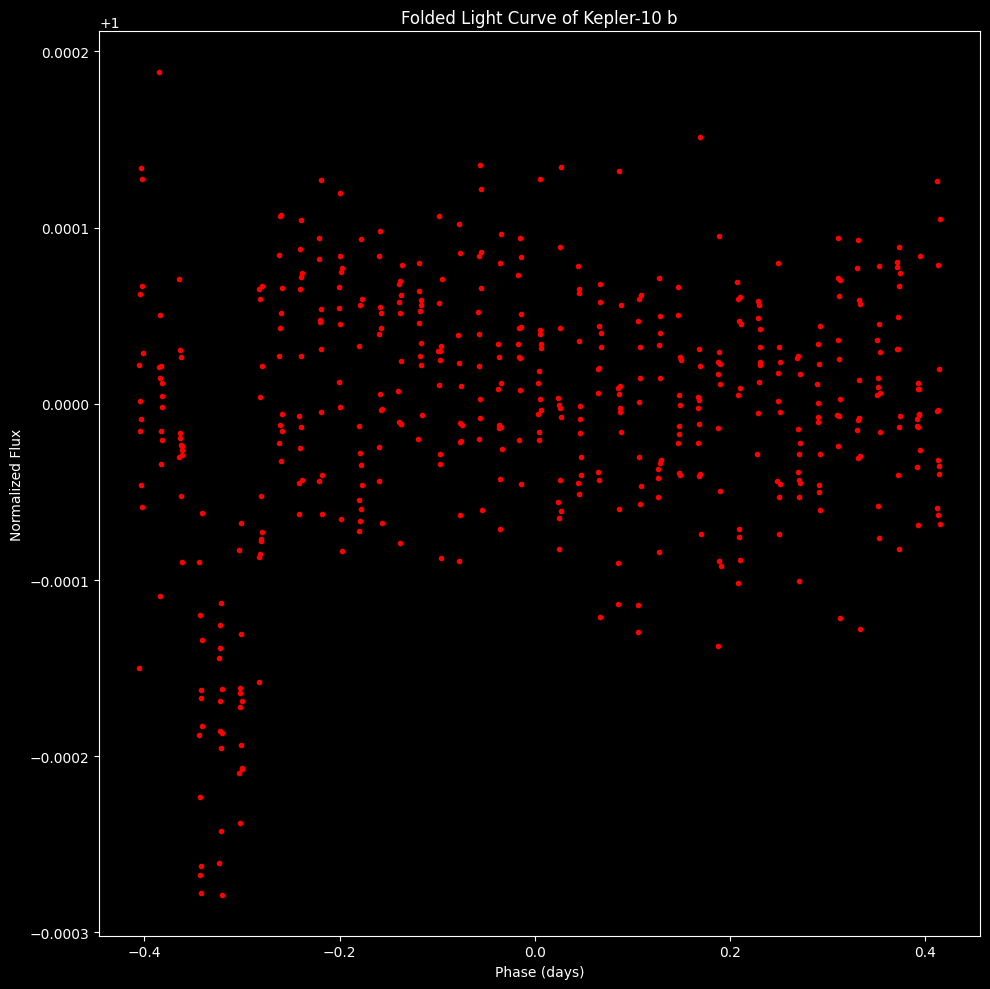

In [60]:
plt.figure(figsize=(10,10))
plt.plot(timeInterval.value,flux,marker=".",linestyle="none",color="red")
plt.xlabel("Phase (days)")
plt.ylabel("Normalized Flux")
plt.title("Folded Light Curve of Kepler-10 b")
plt.tight_layout()
plt.show()